In [ ]:
# For data handling and analysis
import pandas as pd

# For data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split

# For encoding categorical variables as numeric
from sklearn.preprocessing import LabelEncoder

# For building a Random Forest classification model
from sklearn.ensemble import RandomForestClassifier

# For building a Decision Tree classification model
from sklearn.tree import DecisionTreeClassifier

# For building a K-Nearest Neighbors classification model
from sklearn.neighbors import KNeighborsClassifier

# For building a Logistic Regression classification model
from sklearn.linear_model import LogisticRegression

# For calculating model accuracy
from sklearn.metrics import accuracy_score

# For generating detailed classification metrics and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
# Load dataset directly from URL
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Preview the data
df.head()
df.isnull().sum()
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df=df.drop('Cabin', axis=1)
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [ ]:
df.groupby('Sex')['Survived'].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [ ]:
df.groupby('Survived')['Age'].mean()

,Age
Survived,
0,30.415100
1,28.549778


In [ ]:
df.groupby('Pclass')['Survived'].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [ ]:
df.groupby('Pclass')['Fare'].mean()

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


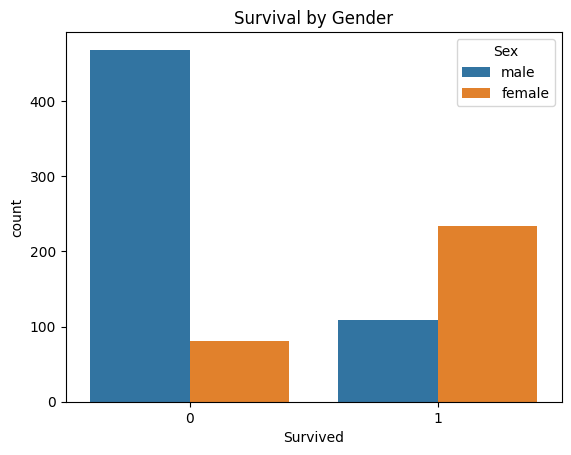

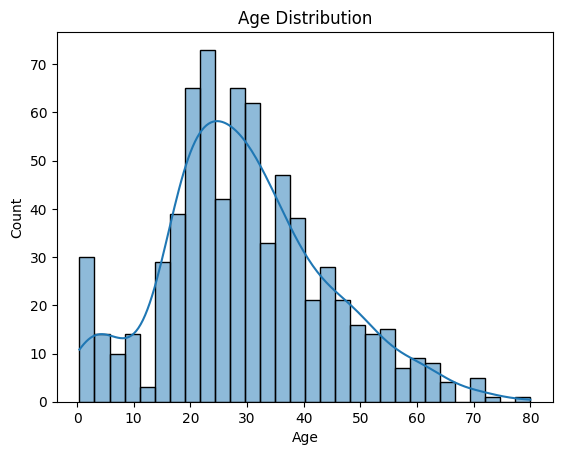

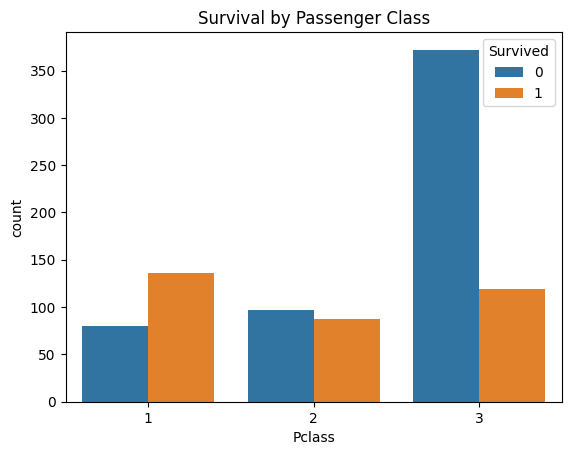

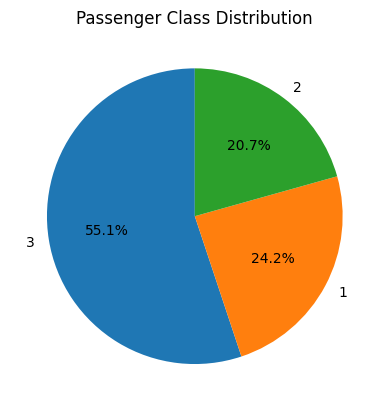

In [ ]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Survival by Gender
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival by Gender")
plt.show()

# Age Distribution
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# Survival by Class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()
# Passenger Class Distribution
class_counts = df['Pclass'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Passenger Class Distribution")
plt.show()

In [14]:
# Drop columns we don't need
df_ml = df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

# Drop rows with missing values (for simplicity)
df_ml = df_ml.dropna()

# Convert categorical columns to numbers
label = LabelEncoder()
df_ml['Sex'] = label.fit_transform(df_ml['Sex'])       # male = 1, female = 0
df_ml['Embarked'] = label.fit_transform(df_ml['Embarked'])  # C, Q, S to 0/1/2

# Split into features (X) and label (y)
X = df_ml.drop('Survived', axis=1)
y = df_ml['Survived']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Train the model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predict using the model
y_pred_log = log_model.predict(X_test)

# Check accuracy
acc_log = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", acc_log)

Logistic Regression Accuracy: 0.7972027972027972


In [17]:
# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict and check accuracy
y_pred_knn = knn_model.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", acc_knn)

KNN Accuracy: 0.7062937062937062


In [18]:
# Train Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_tree = tree_model.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Accuracy:", acc_tree)

Decision Tree Accuracy: 0.6923076923076923


In [20]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("Random Forest Accuracy:", acc_rf)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.7902097902097902

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        80
           1       0.78      0.73      0.75        63

    accuracy                           0.79       143
   macro avg       0.79      0.78      0.79       143
weighted avg       0.79      0.79      0.79       143


Confusion Matrix:
[[67 13]
 [17 46]]


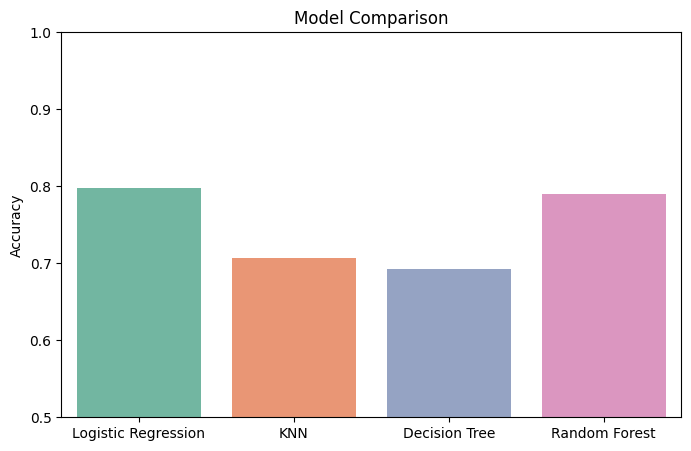

In [31]:
#Comparing the models
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']
accuracies = [acc_log, acc_knn, acc_tree, acc_rf]

plt.figure(figsize=(8, 5))
sns.barplot(
    x=models,
    y=accuracies,
    hue=models,
    palette='Set2',
    legend=False
)

plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.ylim(0.5, 1.0)
plt.show()